In [1]:
import os
from pathlib import Path
from PIL import Image, UnidentifiedImageError
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import shutil
import random
import string
import gzip
import json
import numpy as np
def path_replace(path, old, new):
    return Path(str(path).replace(str(old), str(new)))
def crop_and_resize(img, target_size, mode="center"):
    """Crop to square and resize to target_size
    mode:
      center: center crop
      left: keep left or top most pixels
      right: keep right or bottom most pixels
      random: random crop
    """
    crop_size = min(img.size)
    width, height = img.size
    if width==target_size and height==target_size:
        return img
    left = (width - crop_size)/2
    top = (height - crop_size)/2
    right = (width + crop_size)/2
    bottom = (height + crop_size)/2
    if mode == "center":
        img = img.crop((left, top, right, bottom))
    elif mode == "left":
        img = img.crop((0, 0, right-left, bottom-top))
    elif mode == "right":
        img = img.crop((width-right+left, height-bottom+top, width, height))
    elif mode == "random":
        left_r = random.randint(0, width-right+left)
        top_r = random.randint(0, height-bottom+top)
        img = img.crop((left_r, top_r, left_r+right-left, top_r+bottom-top))
    else:
        raise AssertionError("Wrong mode")
    img = img.resize((target_size, target_size),resample=Image.Resampling.LANCZOS)
    return img
def random_string(n):
    return ''.join(random.sample(string.ascii_letters + string.digits, n))

# DIODE RGBD

25458 train, 771 val

In [20]:
# train split
FOLDER_RGB_IN = Path("/root/autodl-tmp/diode_clean_resize/train/")
FOLDER_DEPTH_IN = Path("/root/autodl-tmp/diode_clean_resize/train/")

FOLDER_RGB_OUT = Path("/root/autodl-tmp/stage2/rgb-diode/train")
FOLDER_DEPTH_OUT = Path("/root/autodl-tmp/stage2/depth-diode/train")
os.makedirs(FOLDER_RGB_OUT,exist_ok=True)
os.makedirs(FOLDER_DEPTH_OUT,exist_ok=True)

rgb_files = list(FOLDER_RGB_IN.glob("*/*/rgb/*.png"))
depth_files = list(FOLDER_DEPTH_IN.glob("*/*/depth/*.png"))
assert len(rgb_files)==len(depth_files)
N = len(rgb_files)
for i in tqdm(range(N)):
    rgb_path = FOLDER_RGB_OUT / "{}.jpg".format(i)
    depth_path = FOLDER_DEPTH_OUT / "{}.png".format(i)
    rgb = Image.open(rgb_files[i])
    rgb.save(rgb_path)
    shutil.copy(depth_files[i], depth_path)

  0%|          | 0/25458 [00:00<?, ?it/s]

In [21]:
# val split
FOLDER_RGB_IN = Path("/root/autodl-tmp/diode_clean_resize/val/")
FOLDER_DEPTH_IN = Path("/root/autodl-tmp/diode_clean_resize/val/")

FOLDER_RGB_OUT = Path("/root/autodl-tmp/stage2/rgb-diode/val")
FOLDER_DEPTH_OUT = Path("/root/autodl-tmp/stage2/depth-diode/val")
os.makedirs(FOLDER_RGB_OUT,exist_ok=True)
os.makedirs(FOLDER_DEPTH_OUT,exist_ok=True)

rgb_files = list(FOLDER_RGB_IN.glob("*/*/rgb/*.png"))
depth_files = list(FOLDER_DEPTH_IN.glob("*/*/depth/*.png"))
assert len(rgb_files)==len(depth_files)
N = len(rgb_files)
for i in tqdm(range(N)):
    rgb_path = FOLDER_RGB_OUT / "{}.jpg".format(i)
    depth_path = FOLDER_DEPTH_OUT / "{}.png".format(i)
    rgb = Image.open(rgb_files[i])
    rgb.save(rgb_path)
    shutil.copy(depth_files[i], depth_path)

  0%|          | 0/771 [00:00<?, ?it/s]

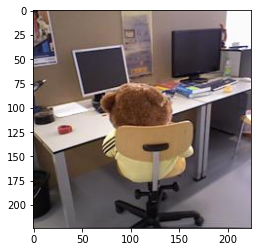

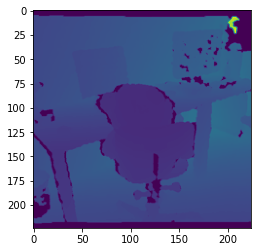

In [58]:
# check
rgb_files = list(FOLDER_RGB_OUT.glob("*.jpg"))
depth_files = list(FOLDER_DEPTH_OUT.glob("*.png"))
assert len(rgb_files)==len(depth_files)
idx = random.randint(0, len(rgb_files)-1)
rgb = Image.open(rgb_files[idx])
depth = Image.open(depth_files[idx])
plt.figure()
plt.imshow(rgb)
plt.figure()
plt.imshow(np.array(depth).astype(float))

# NYUv2 RGBD
1300 train, 149 val

In [32]:
# train split
FOLDER_RGB_IN = Path("/root/autodl-tmp/nyuv2_resize/train/")
FOLDER_DEPTH_IN = Path("/root/autodl-tmp/nyuv2_resize/train/")

FOLDER_RGB_OUT = Path("/root/autodl-tmp/stage2/rgb-nyuv2/train")
FOLDER_DEPTH_OUT = Path("/root/autodl-tmp/stage2/depth-nyuv2/train")
os.makedirs(FOLDER_RGB_OUT,exist_ok=True)
os.makedirs(FOLDER_DEPTH_OUT,exist_ok=True)

rgb_files = list(FOLDER_RGB_IN.glob("*/rgb/*.png"))
depth_files = list(FOLDER_DEPTH_IN.glob("*/depth/*.png"))
assert len(rgb_files)==len(depth_files)
N = len(rgb_files)
for i in tqdm(range(N)):
    rgb_path = FOLDER_RGB_OUT / "{}.jpg".format(i)
    depth_path = FOLDER_DEPTH_OUT / "{}.png".format(i)
    rgb = Image.open(rgb_files[i])
    rgb.save(rgb_path)
    shutil.copy(depth_files[i], depth_path)

  0%|          | 0/1300 [00:00<?, ?it/s]

In [33]:
# val split
FOLDER_RGB_IN = Path("/root/autodl-tmp/nyuv2_resize/val/")
FOLDER_DEPTH_IN = Path("/root/autodl-tmp/nyuv2_resize/val/")

FOLDER_RGB_OUT = Path("/root/autodl-tmp/stage2/rgb-nyuv2/val")
FOLDER_DEPTH_OUT = Path("/root/autodl-tmp/stage2/depth-nyuv2/val")
os.makedirs(FOLDER_RGB_OUT,exist_ok=True)
os.makedirs(FOLDER_DEPTH_OUT,exist_ok=True)

rgb_files = list(FOLDER_RGB_IN.glob("*/rgb/*.png"))
depth_files = list(FOLDER_DEPTH_IN.glob("*/depth/*.png"))
assert len(rgb_files)==len(depth_files)
N = len(rgb_files)
for i in tqdm(range(N)):
    rgb_path = FOLDER_RGB_OUT / "{}.jpg".format(i)
    depth_path = FOLDER_DEPTH_OUT / "{}.png".format(i)
    rgb = Image.open(rgb_files[i])
    rgb.save(rgb_path)
    shutil.copy(depth_files[i], depth_path)

  0%|          | 0/149 [00:00<?, ?it/s]

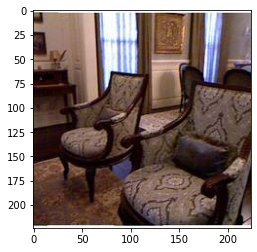

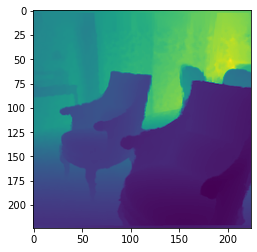

In [41]:
# check
rgb_files = list(FOLDER_RGB_OUT.glob("*.jpg"))
depth_files = list(FOLDER_DEPTH_OUT.glob("*.png"))
assert len(rgb_files)==len(depth_files)
idx = random.randint(0, len(rgb_files)-1)
rgb = Image.open(rgb_files[idx])
depth = Image.open(depth_files[idx])
plt.figure()
plt.imshow(rgb)
plt.figure()
plt.imshow(np.array(depth).astype(float))

# TUM RGBD
110266 train, 19558 val

In [47]:
# train split
FOLDER_RGB_IN = Path("/root/autodl-tmp/tumrgbd_clean_resize/train/")
FOLDER_DEPTH_IN = Path("/root/autodl-tmp/tumrgbd_clean_resize/train/")

FOLDER_RGB_OUT = Path("/root/autodl-tmp/stage2/rgb-tum/train")
FOLDER_DEPTH_OUT = Path("/root/autodl-tmp/stage2/depth-tum/train")
os.makedirs(FOLDER_RGB_OUT,exist_ok=True)
os.makedirs(FOLDER_DEPTH_OUT,exist_ok=True)

rgb_files = list(FOLDER_RGB_IN.glob("*/rgb/*.png"))
depth_files = list(FOLDER_DEPTH_IN.glob("*/depth/*.png"))
assert len(rgb_files)==len(depth_files)
N = len(rgb_files)
for i in tqdm(range(N)):
    rgb_path = FOLDER_RGB_OUT / "{}.jpg".format(i)
    depth_path = FOLDER_DEPTH_OUT / "{}.png".format(i)
    rgb = Image.open(rgb_files[i])
    rgb.save(rgb_path)
    depth = Image.open(depth_files[i])
    depth = (np.array(depth)*0.2).astype(np.uint16)
    depth = Image.fromarray(depth)
    depth.save(depth_path)

  0%|          | 0/110266 [00:00<?, ?it/s]

In [48]:
# val split
# /root/autodl-tmp/stage2/depth-tum/val/19557.png
FOLDER_RGB_IN = Path("/root/autodl-tmp/tumrgbd_clean_resize/val/")
FOLDER_DEPTH_IN = Path("/root/autodl-tmp/tumrgbd_clean_resize/val/")

FOLDER_RGB_OUT = Path("/root/autodl-tmp/stage2/rgb-tum/val")
FOLDER_DEPTH_OUT = Path("/root/autodl-tmp/stage2/depth-tum/val")
os.makedirs(FOLDER_RGB_OUT,exist_ok=True)
os.makedirs(FOLDER_DEPTH_OUT,exist_ok=True)

rgb_files = list(FOLDER_RGB_IN.glob("*/rgb/*.png"))
depth_files = list(FOLDER_DEPTH_IN.glob("*/depth/*.png"))
assert len(rgb_files)==len(depth_files)
N = len(rgb_files)
for i in tqdm(range(N)):
    rgb_path = FOLDER_RGB_OUT / "{}.jpg".format(i)
    depth_path = FOLDER_DEPTH_OUT / "{}.png".format(i)
    rgb = Image.open(rgb_files[i])
    rgb.save(rgb_path)
    depth = Image.open(depth_files[i])
    depth = (np.array(depth)*0.2).astype(np.uint16)
    depth = Image.fromarray(depth)
    depth.save(depth_path)

  0%|          | 0/19558 [00:00<?, ?it/s]

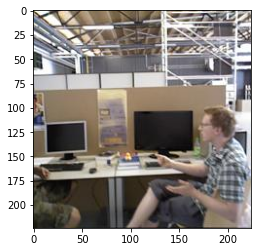

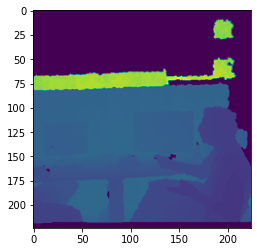

In [56]:
# check
rgb_files = list(FOLDER_RGB_OUT.glob("*.jpg"))
depth_files = list(FOLDER_DEPTH_OUT.glob("*.png"))
assert len(rgb_files)==len(depth_files)
idx = random.randint(0, len(rgb_files)-1)
rgb = Image.open(rgb_files[idx])
depth = Image.open(depth_files[idx])
plt.figure()
plt.imshow(rgb)
plt.figure()
plt.imshow(np.array(depth).astype(float))

# SUN3D RGBD

2407496 train, 170582 val

In [2]:
# train split
FOLDER_RGB_IN = Path("/root/autodl-tmp/sun3d/train/")
FOLDER_DEPTH_IN = Path("/root/autodl-tmp/sun3d/train/")

FOLDER_RGB_OUT = Path("/root/autodl-tmp/stage2/rgb-sun3d/train")
FOLDER_DEPTH_OUT = Path("/root/autodl-tmp/stage2/depth-sun3d/train")
os.makedirs(FOLDER_RGB_OUT,exist_ok=True)
os.makedirs(FOLDER_DEPTH_OUT,exist_ok=True)

rgb_files = list(FOLDER_RGB_IN.glob("*/rgb/*.jpg"))
depth_files = list(FOLDER_DEPTH_IN.glob("*/depth/*.png"))
assert len(rgb_files)==len(depth_files)
N = len(rgb_files)
for i in tqdm(range(N)):
    rgb_path = FOLDER_RGB_OUT / "{}.jpg".format(i)
    depth_path = FOLDER_DEPTH_OUT / "{}.png".format(i)
    shutil.copy(rgb_files[i], rgb_path)
    depth = Image.open(depth_files[i])
    depth = (np.array(depth)/8).astype(np.uint16) # shift 3 bits back
    depth = Image.fromarray(depth)
    depth.save(depth_path)

  0%|          | 0/2407496 [00:00<?, ?it/s]

In [3]:
# val split
FOLDER_RGB_IN = Path("/root/autodl-tmp/sun3d/val/")
FOLDER_DEPTH_IN = Path("/root/autodl-tmp/sun3d/val/")

FOLDER_RGB_OUT = Path("/root/autodl-tmp/stage2/rgb-sun3d/val")
FOLDER_DEPTH_OUT = Path("/root/autodl-tmp/stage2/depth-sun3d/val")
os.makedirs(FOLDER_RGB_OUT,exist_ok=True)
os.makedirs(FOLDER_DEPTH_OUT,exist_ok=True)

rgb_files = list(FOLDER_RGB_IN.glob("*/rgb/*.jpg"))
depth_files = list(FOLDER_DEPTH_IN.glob("*/depth/*.png"))
assert len(rgb_files)==len(depth_files)
N = len(rgb_files)
for i in tqdm(range(N)):
    rgb_path = FOLDER_RGB_OUT / "{}.jpg".format(i)
    depth_path = FOLDER_DEPTH_OUT / "{}.png".format(i)
    shutil.copy(rgb_files[i], rgb_path)
    depth = Image.open(depth_files[i])
    depth = (np.array(depth)/8).astype(np.uint16) # shift 3 bits back
    depth = Image.fromarray(depth)
    depth.save(depth_path)

  0%|          | 0/170582 [00:00<?, ?it/s]

5964


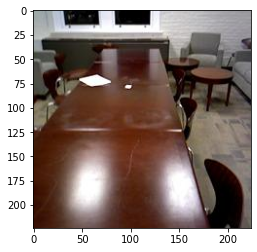

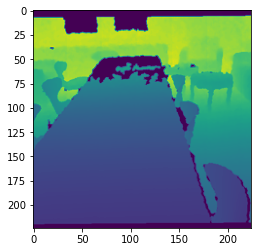

In [9]:
# check
rgb_files = list(FOLDER_RGB_OUT.glob("*.jpg"))
depth_files = list(FOLDER_DEPTH_OUT.glob("*.png"))
assert len(rgb_files)==len(depth_files)
idx = random.randint(0, len(rgb_files)-1)
rgb = Image.open(rgb_files[idx])
depth = Image.open(depth_files[idx])
plt.figure()
plt.imshow(rgb)
plt.figure()
plt.imshow(np.array(depth).astype(float))
print(np.array(depth).max())

3581

In [65]:
depth_path

PosixPath('/root/autodl-tmp/stage2/depth-tum/val/19557.png')

# C4 text and sub

7126345 train text, 45576 val text

In [2]:
from nltk.tokenize import sent_tokenize
# train split
FOLDER_IN = Path("/root/autodl-tmp/c4/en")
FOLDER_INST_OUT = Path("/root/autodl-tmp/stage2/text-c4/train")
FOLDER_SUB_OUT = Path("/root/autodl-tmp/stage2/sub-c4/train")
os.makedirs(FOLDER_INST_OUT,exist_ok=True)
os.makedirs(FOLDER_SUB_OUT,exist_ok=True)
START = 100
END =  120
files = sorted(list(FOLDER_IN.glob("c4-train*.json.gz")))
cnt = 0
for i in tqdm(range(START,END)):
    with gzip.open(files[i], "r") as f:
        for line in f.readlines():
            text = json.loads(line)["text"].replace("\n"," ").strip()
            inst_path = FOLDER_INST_OUT / ("%08d.txt"%(cnt))
            with open(inst_path, "w") as f:
                f.write(text)
            sub_path = FOLDER_SUB_OUT / ("%08d.txt"%(cnt))
            with open(sub_path, "w") as f:
                f.write("\n".join(sent_tokenize(text)))
            cnt += 1
print(cnt)

  0%|          | 0/20 [00:00<?, ?it/s]

7126345


In [5]:
# validation split
FOLDER_IN = Path("/root/autodl-tmp/c4/en")
FOLDER_INST_OUT = Path("/root/autodl-tmp/stage2/text-c4/val")
FOLDER_SUB_OUT = Path("/root/autodl-tmp/stage2/sub-c4/val")
os.makedirs(FOLDER_INST_OUT,exist_ok=True)
os.makedirs(FOLDER_SUB_OUT,exist_ok=True)
START = 2
END =  3
files = sorted(list(FOLDER_IN.glob("c4-val*.json.gz")))
cnt = 0
for i in tqdm(range(START,END)):
    with gzip.open(files[i], "r") as f:
        for line in f.readlines():
            text = json.loads(line)["text"].replace("\n"," ").strip()
            inst_path = FOLDER_INST_OUT / ("%08d.txt"%(cnt))
            with open(inst_path, "w") as f:
                f.write(text)
            sub_path = FOLDER_SUB_OUT / ("%08d.txt"%(cnt))
            with open(sub_path, "w") as f:
                f.write("\n".join(sent_tokenize(text)))
            cnt += 1
print(cnt)

  0%|          | 0/1 [00:00<?, ?it/s]

45576


In [6]:
# check
FOLDER_OUT = Path("/root/autodl-tmp/stage2/sub-c4/val")
files = sorted(list(FOLDER_OUT.glob("*.txt")))
print(files[0])
with open(files[4], "r") as f:
    print(f.read())

/root/autodl-tmp/stage2/sub-c4/val/00000000.txt
This was the very first recipe I ever made by myself.
I was about 11 years old.
Yes I have been cooking pretty much my whole life, remember this picture?
You can read about it here.
Anyways, I was an interesting child.
Normal children ask for toys for Christmas.
Not me.
I asked for a Mixer.
Yeah, like a kitchen aid.
And no, I didn't actually get a Kitchen Aid, I got a cheap knock-off.
But I didn't care.
I was thrilled about my new mixer, and ended up making these cookies to test it out!
I grew up eating these cookies, especially during Christmas time.
They are basically a shortbread cookie, and they are delicious!
I actually made this dough a while back and froze some cookie dough to see if they would turn out.
It turns out that it freezes great, and I just had to cook them a little bit longer and they were just as delicious!
PS: I still don't own a Kitchen Aid mixer.
These are my all time favorite cookie!
They're a must on our Christmas 